In [424]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [425]:
# Import the data
df = pd.read_csv('../data/wine_dataset.csv')
df.reset_index(inplace=True, drop=True)
df.head()

# Check there are no NaN'
assert (df.isnull().values.any() == False)

# How many qualities?
print(df['quality'].nunique())

# Split into x and y
features = [x for x in df.columns if x != 'quality']
x = df.loc[:, features]
y = df['quality']

# Assert quality not in features
assert 'quality' not in x.columns

# Split data into train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

7


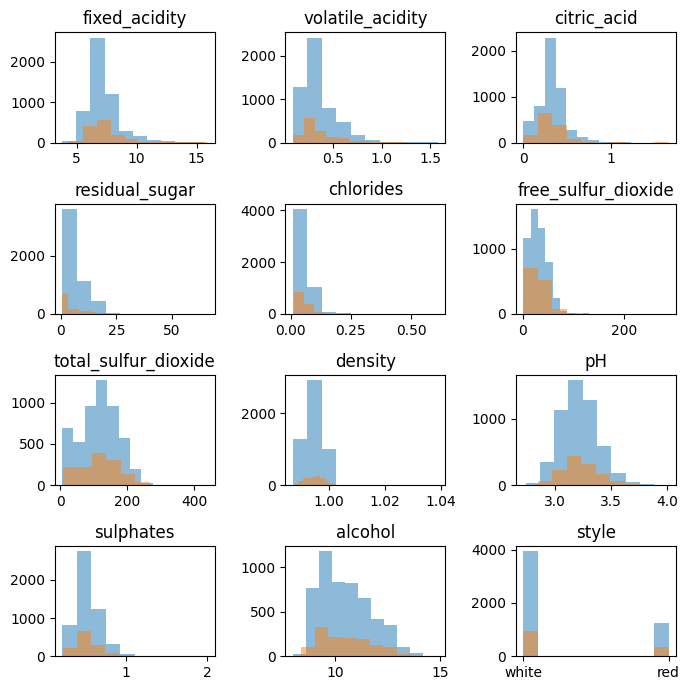

In [426]:
# Examine the distribution overlap feature space - distrinutions should overlap well
nrows = len(features) // 3
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(7,7))
for i, subplot in enumerate(ax.flatten()):
    feature = features[i]
    x = x_train.loc[:, feature]
    y = x_test.loc[:, feature]
    subplot.hist(x, alpha=0.5)
    subplot.hist(y, alpha=0.5)
    subplot.set_title(feature)
plt.tight_layout()
plt.savefig('../plots/histogram_tt_split.png')
plt.show()



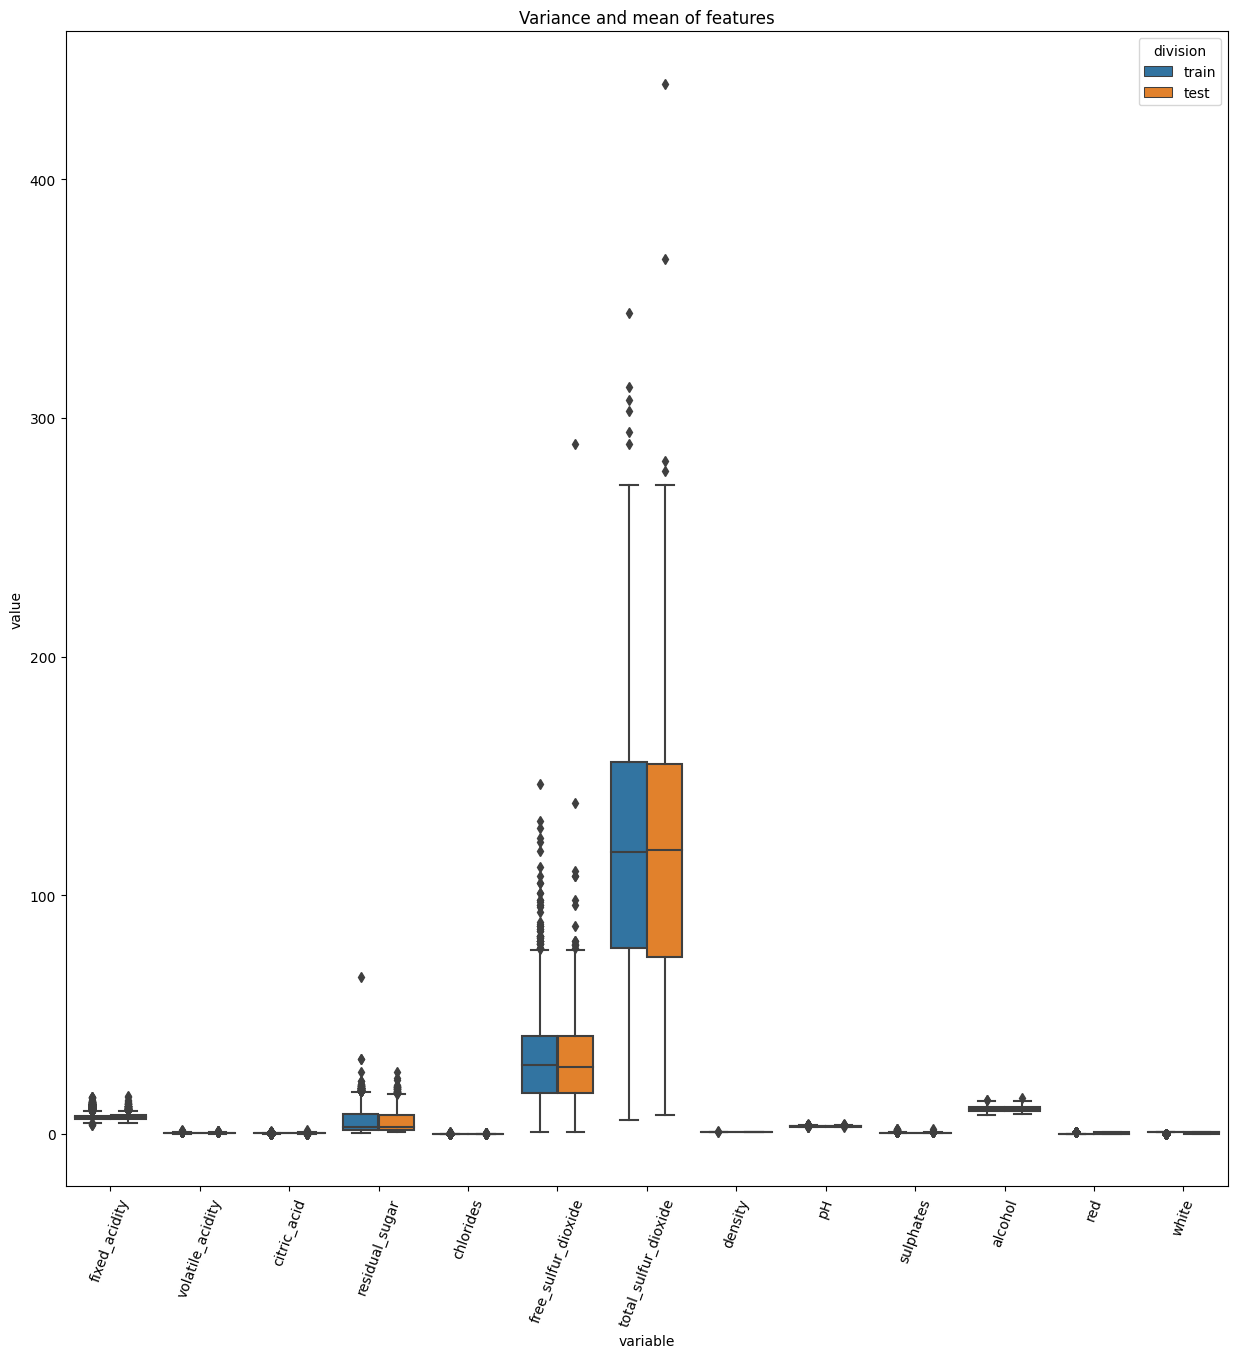

In [427]:
# Example the mean and variance of all the data in train and test
x_train['division'] = 'train'
x_test['division'] = 'test'
grouped_data = pd.concat([x_train, x_test], axis=0, ignore_index=True)

# Categorically encode style feature
ohe_style = pd.get_dummies(grouped_data['style'], dtype=float)
grouped_data=pd.concat([grouped_data, ohe_style], axis=1)
grouped_data.drop(inplace=True, columns='style')

# Create grouped boxplot 
d = grouped_data.melt(id_vars=['division'])

# Plot
plt.subplots(figsize=(15,15))
sns.boxplot(data=d, x="variable", y="value", hue="division")
plt.title('Variance and mean of features')
plt.xticks(rotation=70)
plt.savefig('../plots/boxplot_raw_tt_split.png')
plt.show()

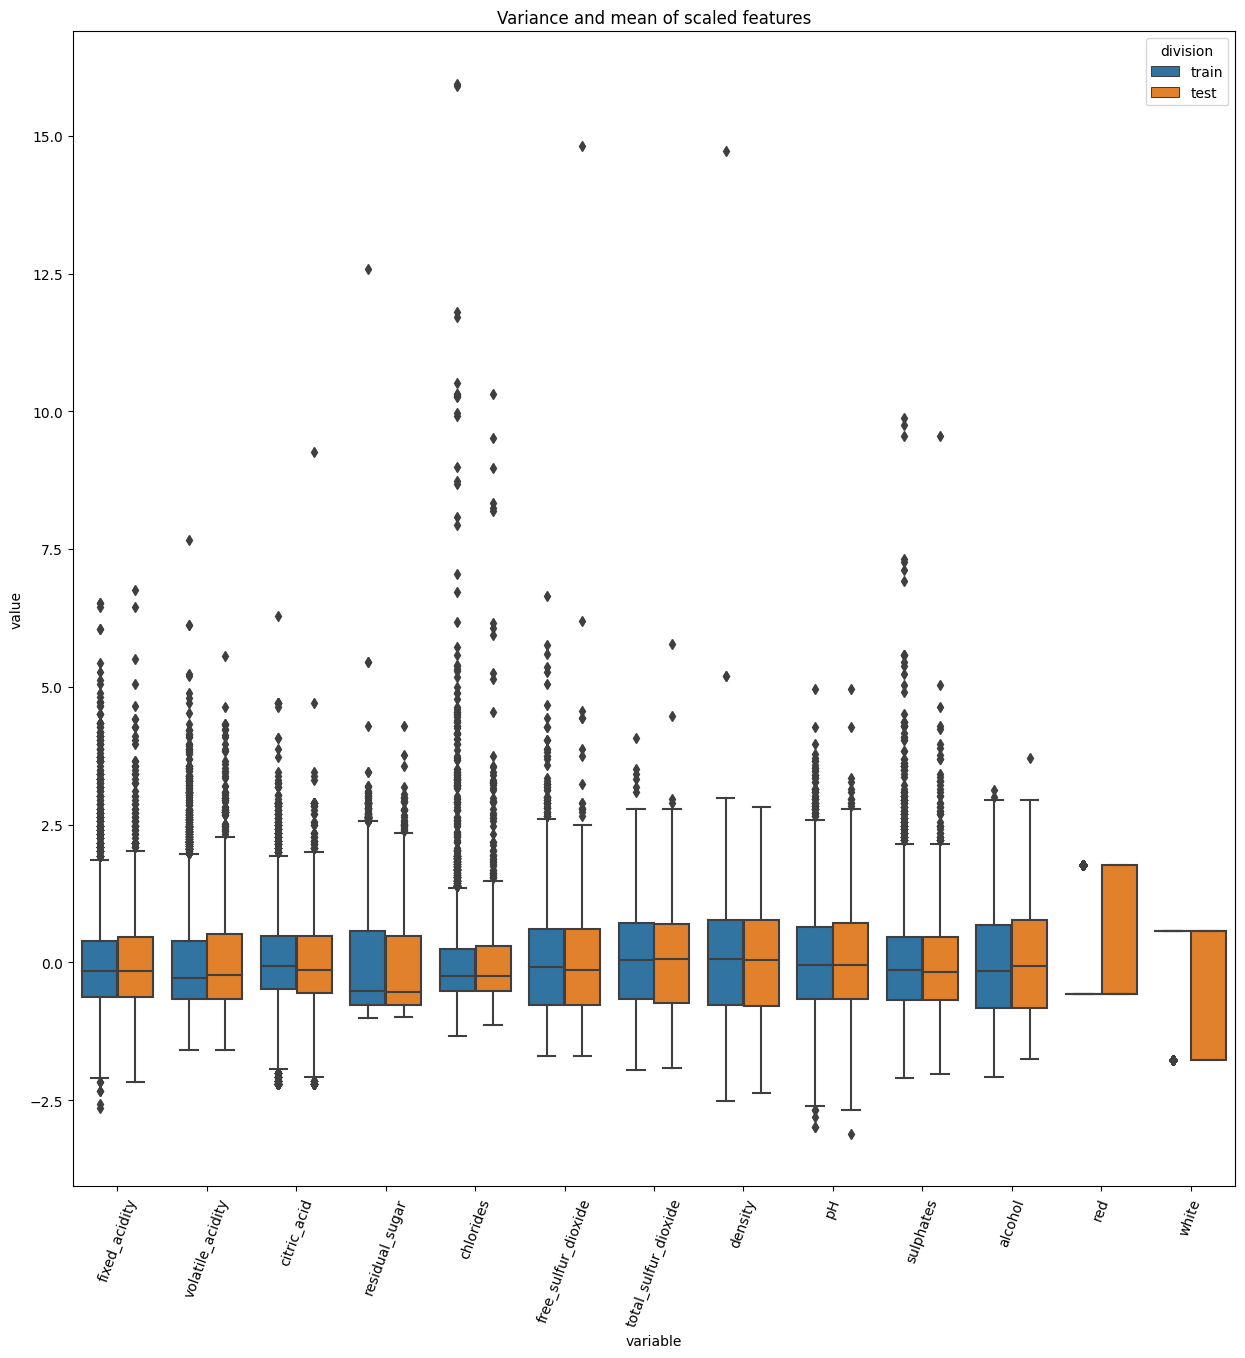

In [428]:
# Scale the features using z-normalisation
x_train = grouped_data[grouped_data['division'] == 'train'].drop(columns='division', inplace=False)
x_test = grouped_data[grouped_data['division'] == 'test'].drop(columns='division', inplace=False)

# Scale and tranform test set
ss = StandardScaler()
ss_train = ss.fit_transform(x_train)
ss_test = ss.transform(x_test)

# Convert back to dataframe
ss_train = pd.DataFrame(ss_train, columns=x_train.columns)
ss_test = pd.DataFrame(ss_test, columns=x_test.columns)

# Examine the new transformed data
ss_train['division'] = 'train'
ss_test['division'] = 'test'
ss_grouped_data = pd.concat([ss_train, ss_test], axis=0, ignore_index=True)
ssd = ss_grouped_data.melt(id_vars=['division'])

# Plot
plt.subplots(figsize=(15,15))
sns.boxplot(data=ssd, x="variable", y="value", hue="division")
plt.title('Variance and mean of scaled features')
plt.xticks(rotation=70)
plt.savefig('../plots/boxplot_preprocessed_tt_split.png')
plt.show()

# Check the distributions again
nrows = np.shape(ss_train)[1] // 3
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(12,12))
for i, subplot in enumerate(ax.flatten()):
    feature = ss_train.columns[i]
    x = ss_train.loc[:, feature]
    y = ss_test.loc[:, feature]
    subplot.hist(x, alpha=0.5)
    subplot.hist(y, alpha=0.5)
    subplot.set_title(feature)
plt.tight_layout()

## Recompute and couple labels 

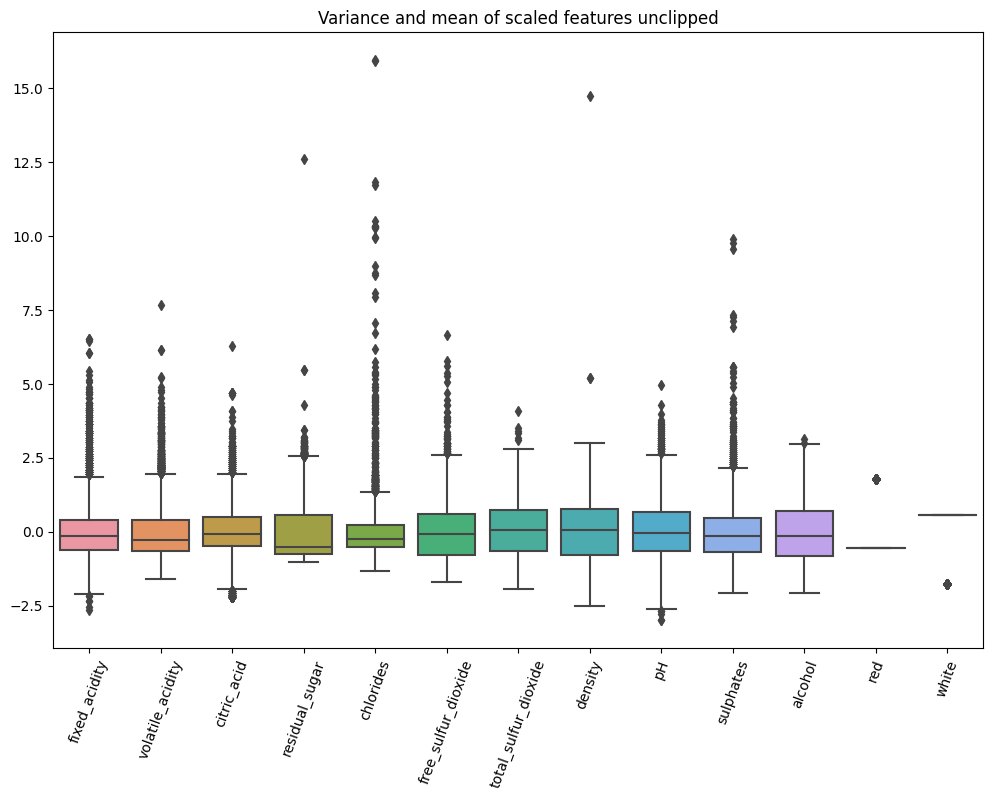

In [ ]:
CLIP = True
# Import the data
df = pd.read_csv('../data/wine_dataset.csv')
df.reset_index(inplace=True, drop=True)
df.head()

# Categorically encode style feature
ohe_style = pd.get_dummies(df['style'], dtype=float)
df=pd.concat([df, ohe_style], axis=1)
df.drop(inplace=True, columns='style')

# Split data into train-test split
features = [x for x in df.columns if x != 'quality']
y = df['quality']
x = df.loc[:, features]

# Clip outliers to the 95th and 5th percentile?
if CLIP:
    plot_name = 'clippped'
    thresh = x.quantile([.05,.95])
    x = x.clip(lower=thresh.loc[.05], 
            upper=thresh.loc[.95],
            axis=1)
else:
    plot_name = 'unclipped'

# Create train test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Rest the indices
x_train.reset_index(inplace=True, drop=True)
x_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Scale and tranform test set
ss = StandardScaler()
ss_train = ss.fit_transform(x_train)
ss_test = ss.transform(x_test)

# Convert back to dataframe
ss_train = pd.DataFrame(ss_train, columns=x_train.columns)
ss_test = pd.DataFrame(ss_test, columns=x_test.columns)

# Plot
plt.subplots(figsize=(12,8))
sns.boxplot(data=ss_train)
plt.title(f'Variance and mean of scaled features {plot_name}')
plt.xticks(rotation=70)
plt.savefig(f'../plots/ss_train_boxploit_{plot_name}.png')
plt.show()


## Save the data for consistency

In [ ]:
# Features
ss_train.to_csv(f'../data/scaled_{plot_name}_train_x.csv', index=False)
y_train.to_csv('../data/train_y.csv',  index=False)

# Labels
ss_test.to_csv(f'../data/scaled_{plot_name}_test_x.csv',  index=False)
y_test.to_csv('../data/test_y.csv',  index=False)
